100%|██████████| 303/303 [00:00<00:00, 433.02it/s] 


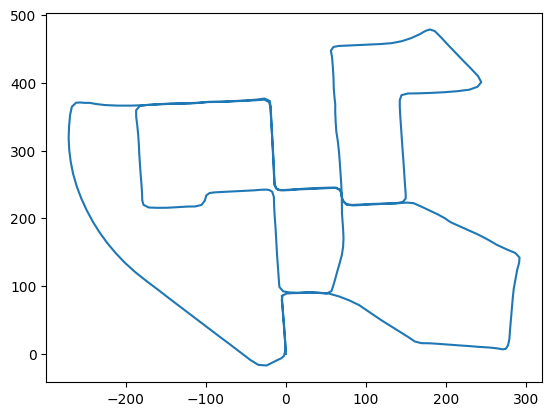

In [12]:
import numpy as np
from RelaPose_2pc_function import *
import cv2 as cv
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pytransform3d.transformations as pt
from pytransform3d.transform_manager import TransformManager

def addPose(num, w_list, ax0, s):
    print("num:", num)
    ax = tm.plot_frames_in("o", s=s, ax = ax0, show_name=False, whitelist=w_list[num-1:num])

posefile = open("../kitti_dataset/data_odometry_poses/dataset/poses/00.txt").readlines()

tm = TransformManager()
max_m = [0, 0, 0]
min_m = [0, 0, 0]
now_x = 0
now_y = 0
now_z = 0
x = []
y = []
z = []
w_list = []
for i, l in enumerate(tqdm(posefile[::15])):
    m = np.array(l[:-1].split(' ')).reshape(3,4)
    r = m[:3,:3]
    t = m[:3,3]
    now_x = float(t[0])
    now_y = float(t[1])
    now_z = float(t[2])
    x.append(now_x)
    y.append(now_y)
    z.append(now_z)
    for j in range(3):
        max_m[j] = max(max_m[j], float(t[j])) 
        min_m[j] = min(min_m[j], float(t[j]))
    pose = pt.transform_from(r, t)
    tm.add_transform("p"+str(i), "o", pose)
    w_list.append("p"+str(i))

plt.plot(x,z)
plt.show()

100%|██████████| 99/99 [00:37<00:00,  2.61it/s]


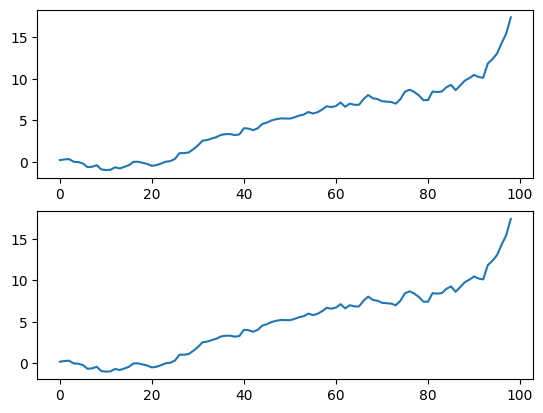

In [16]:
image_file = "kitti"

image_num = 150
now_angle = []
now_trans = []
start_index = 0
end_index = 500
for i in tqdm(range(start_index,end_index-1)):
    length = len(str(i))
    image1_name = "0"*(6-length) +str(i)+".png"
    length = len(str(i+1))
    image2_name = "0"*(6-length) +str(i+1)+".png"
    img1 = cv.imread("../kitti_dataset/00/image_0/"+image1_name,cv.IMREAD_GRAYSCALE)
    img2 = cv.imread("../kitti_dataset/00/image_0/"+image2_name,cv.IMREAD_GRAYSCALE)
    # read K
    K1_mat=np.loadtxt("./data/"+image_file+"/camera_info.txt")
    K2_mat=np.loadtxt("./data/"+image_file+"/camera_info.txt")

    best_model = planar_motion_calcu(img1,img2,K1_mat,K2_mat)
    if i == start_index:
        now_angle.append(best_model[0][0])
        now_trans.append(best_model[0][1])
    else:
        now_angle.append(now_angle[-1]+best_model[0][0])
        now_trans.append(now_trans[-1]+best_model[0][1])


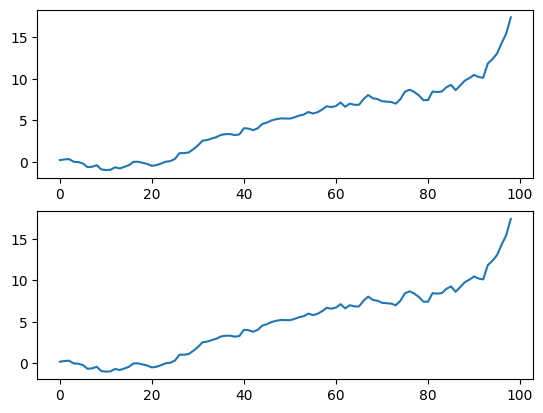

In [17]:
plt.subplot(211)
plt.plot([i for i in range(start_index,end_index-1)], now_angle)
plt.subplot(212)
plt.plot([i for i in range(start_index,end_index-1)], now_trans)
plt.savefig("../kitti_dataset/00/"+"/python"+str(start_index)+"_"+str(end_index)+"_result.png", transparent=True,dpi=600)
plt.show()